# Fruit Image Classification using InceptionResNetV2
This notebook is written and executed by **Dr Raheel Siddiqi** on 12-05-2019 and 13-05-2019. The notebook presents an experiment to classify fruit images using *transfer learning*. [Fruits 360](https://www.kaggle.com/moltean/fruits) dataset (containing 52262 training images and 17540 test images belonging to 101 fruit classes) has been exploited for the task. The model designed uses **InceptionResNetV2** pre-trained model as the convolutional base.

## Tensorflow and Keras version used

In [19]:
import tensorflow as tf
from tensorflow.python import keras

print('Tensorflow Version: ', tf.__version__)
print('Keras Version: ', keras.__version__)

Tensorflow Version:  1.13.1
Keras Version:  2.2.4-tf


## Setting up the Model

In [4]:
from tensorflow.python.keras.applications import InceptionResNetV2

conv_base=InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [5]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization_v1[0][0]     
__________________________________________________________________________________________________
conv2d_1 (

In [6]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import ModelCheckpoint

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))
filepath="InceptionResNetV2_fruit_image_classification_best_model_101_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 1, 1, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
dense_1 (Dense)              (None, 101)               51813     
Total params: 55,175,493
Trainable params: 55,114,949
Non-trainable params: 60,544
_________________________________________________________________


## Setting up Training and Validation Data for the experiment

In [8]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Training'

In [9]:
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'

In [10]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])

In [11]:
batch_size=32
number_of_training_samples=52262
number_of_test_samples=17540

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 52262 images belonging to 101 classes.
Found 17540 images belonging to 101 classes.


## Model Training

In [18]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=50,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Epoch 1/50
1634/1634 [==============================] - 872s 534ms/step - loss: 0.1429 - categorical_accuracy: 0.9733 - val_loss: 0.0240 - val_categorical_accuracy: 0.9924
Epoch 2/50
1634/1634 [==============================] - 831s 509ms/step - loss: 0.0325 - categorical_accuracy: 0.9915 - val_loss: 0.0141 - val_categorical_accuracy: 0.9949
Epoch 3/50
1634/1634 [==============================] - 822s 503ms/step - loss: 0.0229 - categorical_accuracy: 0.9941 - val_loss: 0.1318 - val_categorical_accuracy: 0.9746
Epoch 4/50
1634/1634 [==============================] - 823s 504ms/step - loss: 0.0218 - categorical_accuracy: 0.9940 - val_loss: 0.0300 - val_categorical_accuracy: 0.9906
Epoch 5/50
1634/1634 [==============================] - 826s 505ms/step - loss: 0.0183 - categorical_accuracy: 0.9947 - val_loss: 0.0718 - val_categorical_accuracy: 0.9848
Epoch 6/50
1634/1634 [==============================] - 831s 509ms/step - loss: 0.0174 - categorical_accuracy: 0.9954 - val_loss: 0.0189 - v

Epoch 31/50
1634/1634 [==============================] - 806s 493ms/step - loss: 0.0065 - categorical_accuracy: 0.9983 - val_loss: 0.1912 - val_categorical_accuracy: 0.9852
Epoch 32/50
1634/1634 [==============================] - 807s 494ms/step - loss: 0.0081 - categorical_accuracy: 0.9982 - val_loss: 0.1692 - val_categorical_accuracy: 0.9867
Epoch 33/50
1634/1634 [==============================] - 943s 577ms/step - loss: 0.0080 - categorical_accuracy: 0.9985 - val_loss: 0.8532 - val_categorical_accuracy: 0.9263
Epoch 34/50
1634/1634 [==============================] - 802s 491ms/step - loss: 0.0098 - categorical_accuracy: 0.9975 - val_loss: 0.3109 - val_categorical_accuracy: 0.9722
Epoch 35/50
1634/1634 [==============================] - 860s 526ms/step - loss: 0.0058 - categorical_accuracy: 0.9985 - val_loss: 0.3932 - val_categorical_accuracy: 0.9617
Epoch 36/50
1634/1634 [==============================] - 981s 601ms/step - loss: 0.0062 - categorical_accuracy: 0.9986 - val_loss: 0.22

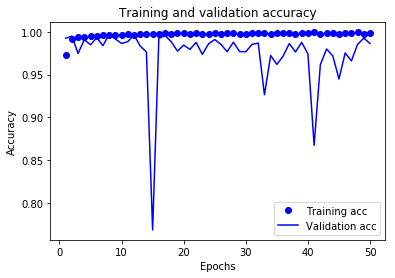

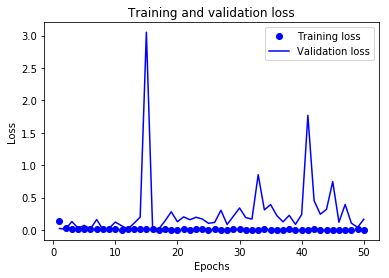

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_InceptionResNetV2_data augmentation_a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_InceptionResNetV2_data augmentation_b',format='png')
plt.show()

## Loading the Best Model

In [1]:
from tensorflow.python.keras.models import load_model

best_model = load_model('InceptionResNetV2_fruit_image_classification_best_model_101_classes.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## Evaluating the Best Model

In [13]:
steps_test=int(17540/32)
print(steps_test)
result = best_model.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

548
Test-set classification accuracy: 99.68%


## Predicting labels for Fruit Images

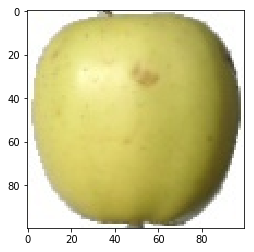

1/1 [==============================] - 3s 3s/sample
True label: Apple Golden 2
Predicted label: Apple Golden 2


In [14]:
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline

TEST_DIR='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'
CATEGORIES=[]
for category in os.listdir(TEST_DIR):
    CATEGORIES.append(category)
img_array = cv2.imread('99_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Apple Golden 2')
print('Predicted label:',pred_name)

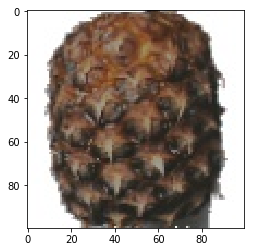

1/1 [==============================] - 0s 48ms/sample
True label: Pineapple
Predicted label: Pineapple


In [15]:
img_array = cv2.imread('214_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Pineapple')
print('Predicted label:',pred_name)

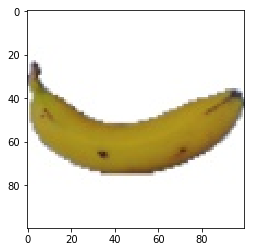

1/1 [==============================] - 0s 62ms/sample
True label: Banana
Predicted label: Banana


In [17]:
img_array = cv2.imread('110_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Banana')
print('Predicted label:',pred_name)

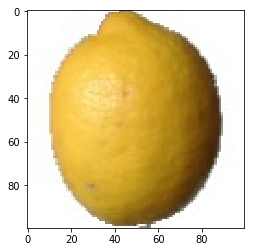

1/1 [==============================] - 0s 47ms/sample
True label: Lemon
Predicted label: Lemon


In [19]:
img_array = cv2.imread('63_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Lemon')
print('Predicted label:',pred_name)

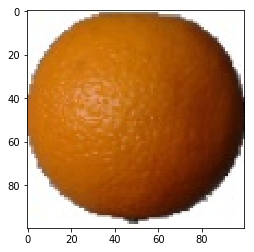

1/1 [==============================] - 0s 62ms/sample
True label: Orange
Predicted label: Orange


In [20]:
img_array = cv2.imread('60_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Orange')
print('Predicted label:',pred_name)

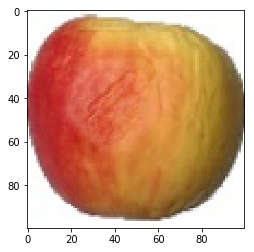

1/1 [==============================] - 0s 62ms/sample
True label: Apple Red Yellow 1
Predicted label: Apple Red Yellow 1


In [21]:
img_array = cv2.imread('64_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Apple Red Yellow 1')
print('Predicted label:',pred_name)

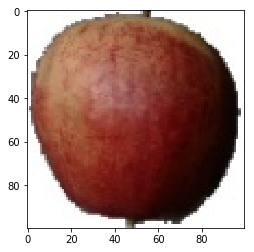

1/1 [==============================] - 0s 62ms/sample
True label: Apple Red 3
Predicted label: Apple Red 3


In [22]:
img_array = cv2.imread('4_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Apple Red 3')
print('Predicted label:',pred_name)

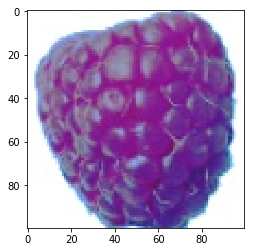

1/1 [==============================] - 0s 47ms/sample
True label: Raspberry
Predicted label: Raspberry


In [23]:
img_array = cv2.imread('77_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Raspberry')
print('Predicted label:',pred_name)

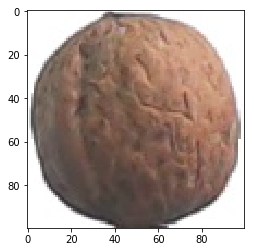

1/1 [==============================] - 0s 47ms/sample
True label: Walnut
Predicted label: Walnut


In [24]:
img_array = cv2.imread('12_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Walnut')
print('Predicted label:',pred_name)

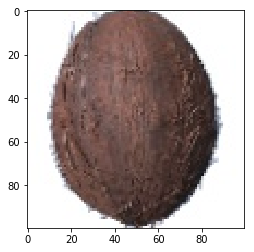

1/1 [==============================] - 0s 47ms/sample
True label: Cocos
Predicted label: Cocos


In [25]:
img_array = cv2.imread('0_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = best_model.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Cocos')
print('Predicted label:',pred_name)